In [1]:
#make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../")
import copy
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver
import networkx as nx
import torch
from torch import DoubleTensor as Tensor

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x7f47046ba278>


In [2]:
base_input = '../input_files/ap2.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()

['A']
['M']
['B']
['S']
-----
{'A'}
{'A'}
set()
-----
{'A'}
{'M'}
{'A'}
False
Allowed edges: 
('A', 'B')
Allowed edges: 
('A', 'M')
Connected Nodes:  ['A', 'M']
Connected Edges:  [('A', 'M')]
Allowed edges: 
('A', 'S')
Allowed edges: 
('B', 'M')
Allowed edges: 
('M', 'S')
New node added--1
['A', 'M']
{('A', 'B'): [None, None, 1, tensor([-10000.], dtype=torch.float64)], ('A', 'M'): [None, None, 1, tensor([-10000.], dtype=torch.float64)], ('A', 'S'): [None, None, 1, tensor([-10000.], dtype=torch.float64)], ('B', 'M'): [None, None, 1, tensor([-10000.], dtype=torch.float64)], ('M', 'S'): [None, None, 1, tensor([-10000.], dtype=torch.float64)]}
New node added--2
[0, 1, 2, 3, 4]
-----
{'A'}
{'B'}
{'A'}
False
Allowed edges: 
('A', 'B')
Connected Nodes:  ['A', 'B']
Connected Edges:  [('A', 'B')]
Allowed edges: 
('A', 'M')
Allowed edges: 
('A', 'S')
Allowed edges: 
('B', 'M')
Allowed edges: 
('M', 'S')
New node added--1
['A', 'B']
{('A', 'B'): [None, None, 1, tensor([-10000.], dtype=torch.float

In [3]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_dict[(n,k)] = uid

print(uid_dict)


{(0, 4): 0, (0, 5): 1, (0, 6): 2, (0, 9): 17, (0, 10): 18, (0, 13): 20, (1, 4): 0, (1, 7): 3, (1, 8): 4, (1, 9): 5, (1, 10): 6, (1, 13): 19, (2, 5): 1, (2, 7): 3, (2, 9): 7, (2, 11): 8, (2, 12): 9, (2, 13): 10, (3, 6): 2, (3, 8): 4, (3, 10): 11, (3, 11): 12, (3, 12): 13, (3, 13): 14, (4, 9): 7, (4, 10): 11, (5, 9): 5, (5, 11): 12, (5, 13): 15, (6, 10): 6, (6, 11): 8, (6, 13): 16, (7, 12): 13, (7, 13): 16, (7, 9): 17, (8, 12): 9, (8, 13): 15, (8, 10): 18, (9, 13): 14, (10, 13): 10, (11, 13): 19, (12, 13): 20}


In [4]:
new_kon = torch.zeros([rn._rxn_count], requires_grad=True).double()
new_kon = [9.1217,  8.7610,  8.7610,  8.7610,  8.7610, 12.9159, 12.9159, 12.9153,6.7536,  6.7536, 14.6840, 12.9153,  6.7536,  6.7536, 14.6840, 10.4965,10.4965, 12.9159, 12.9159, 12.8095, 12.8095] # M-1 s-1

update_kon_dict = {}
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
    update_kon_dict[edge] = new_kon[uid_dict[edge]]

nx.set_edge_attributes(rn.network,update_kon_dict,'k_on')
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-10000.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-10000.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-10000.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20000.], dtype=torch.float64), 'uid': 17}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20000.], dtype=torch.float64), 'uid': 18}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-30000.], dtype=torch.float64), 'uid': 20}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-10000.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-10000.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-10000.], dtype=torch.float64), 'uid': 4}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20000.], dtype=tor

In [5]:

vec_rn = VectorizedRxnNet(rn, dev='cpu')
# print(vec_rn.kon)
runtime = 50
sim = VecSim(vec_rn, runtime, device='cpu')
y = sim.simulate()


Using CPU
delta_copies:  tensor([-0.6033, -0.6033, -0.3967, -0.3967,  0.2065,  0.1984,  0.1984,  0.1984,
         0.1984,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       dtype=torch.float64, grad_fn=<MvBackward>)
Final copies:  tensor(0., dtype=torch.float64, grad_fn=<SelectBackward>)
delta_copies:  tensor([-5.8418e-01, -5.8418e-01, -3.9170e-01, -3.9170e-01,  1.8096e-01,
         1.8073e-01,  1.8073e-01,  1.8073e-01,  1.8073e-01,  1.7700e-02,
         1.7700e-02,  6.1738e-03,  6.1738e-03,  1.9820e-04],
       dtype=torch.float64, grad_fn=<MvBackward>)
Final copies:  tensor(0.0002, dtype=torch.float64, grad_fn=<SelectBackward>)
delta_copies:  tensor([-0.5655, -0.5655, -0.3871, -0.3871,  0.1571,  0.1639,  0.1639,  0.1639,
         0.1639,  0.0331,  0.0331,  0.0118,  0.0118,  0.0023],
       dtype=torch.float64, grad_fn=<MvBackward>)
Final copies:  tensor(0.0025, dtype=torch.float64, grad_fn=<SelectBackward>)
delta_copies:  tensor([-0.5471, -0.5471, -0.3828, -0.3828,  0.1349,  0.1479

Text(0.5, 1.0, 'runtime: 50 seconds')

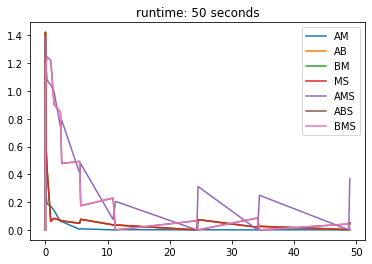

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
nodes_list = ['AB','BMS','ABS','AMS','AM','BM','MS']
sim.plot_observable(nodes_list, ax=ax)
ax.set_title("runtime: " + str(runtime) + " seconds")